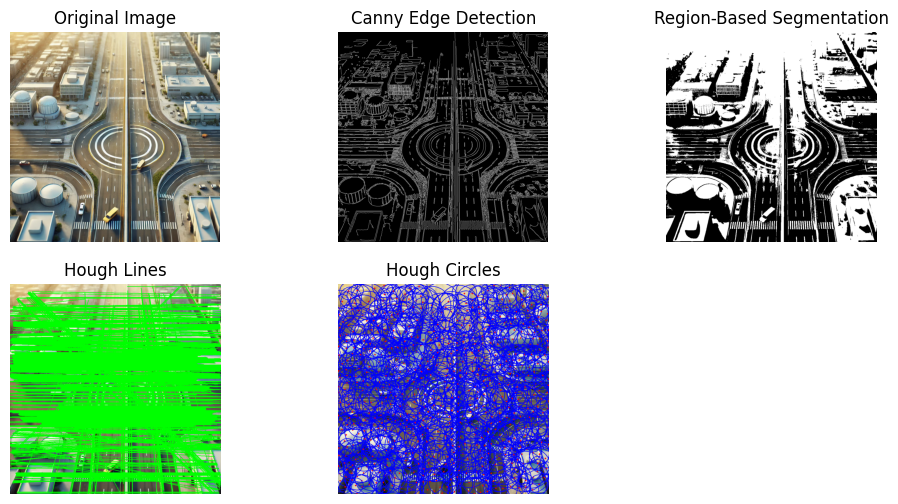

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/road.webp"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 1. Edge-Based Segmentation using Canny Edge Detection
edges = cv2.Canny(gray, 50, 150)

# 2. Region-Based Segmentation using Thresholding
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# 3. Hough Transform for Line Detection
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)
line_image = np.copy(image)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 4. Hough Transform for Circle Detection
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, 30, param1=50, param2=30, minRadius=10, maxRadius=100)
circle_image = np.copy(image)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(circle_image, (i[0], i[1]), i[2], (255, 0, 0), 2)  # Circle outline
        cv2.circle(circle_image, (i[0], i[1]), 2, (0, 0, 255), 3)     # Center

# Display Results
titles = ['Original Image', 'Canny Edge Detection', 'Region-Based Segmentation', 'Hough Lines', 'Hough Circles']
images = [image, edges, thresh, line_image, circle_image]

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 3, i+1)
    if i == 1 or i == 2:
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.9/921.9 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

100%|██████████| 6.25M/6.25M [00:00<00:00, 150MB/s]



0: 640x640 2 bowls, 654.6ms
Speed: 37.0ms preprocess, 654.6ms inference, 35.4ms postprocess per image at shape (1, 3, 640, 640)


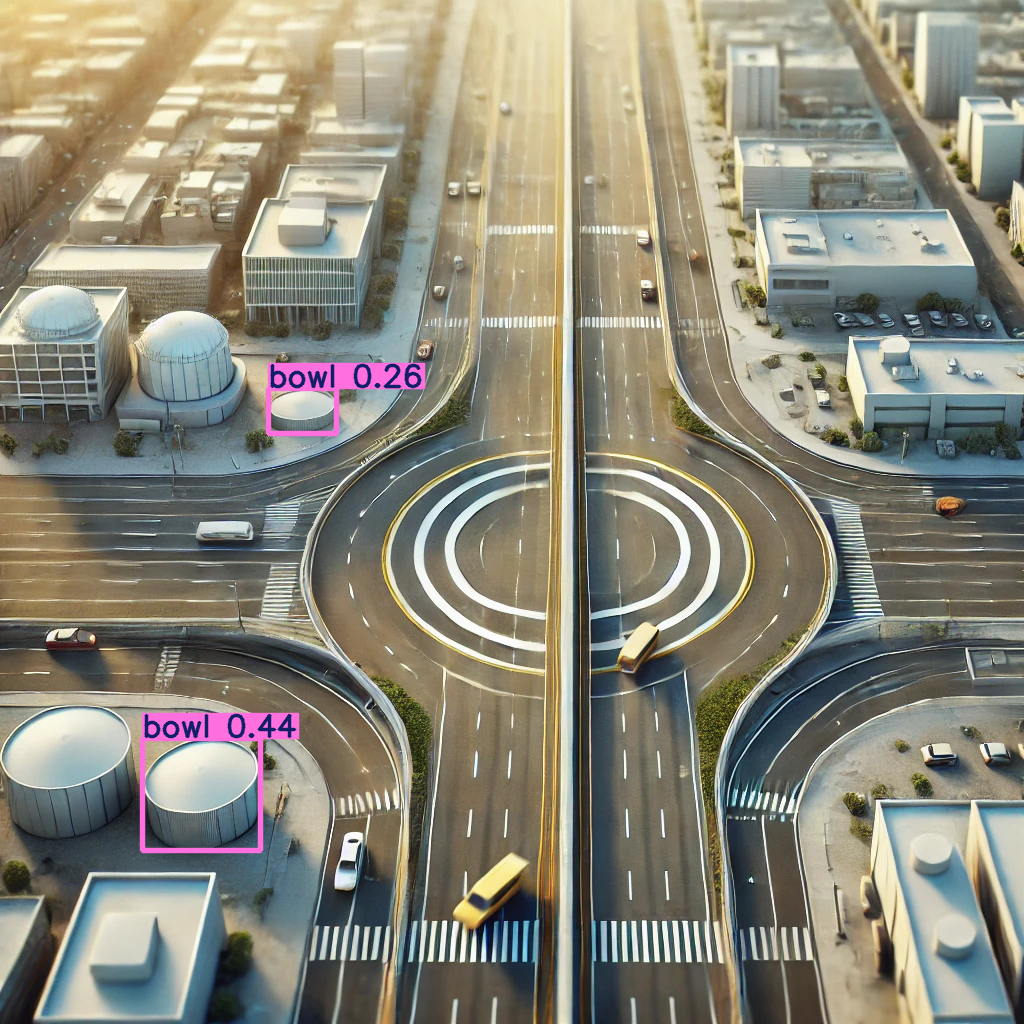

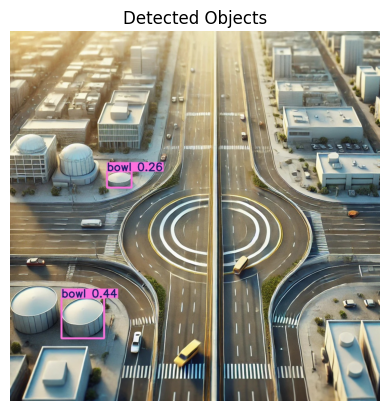

In [3]:
!pip install opencv-python ultralytics
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the YOLO model (change 'yolov8n.pt' to other variants like 'yolov8m.pt' for better accuracy)
model = YOLO('yolov8n.pt')  # YOLOv8 nano (lightweight version)

# Load the image
image_path = "/content/road.webp"
image = cv2.imread(image_path)

# Perform object detection
results = model(image)

# Plot the detected objects
for result in results:
    result.show()  # Shows the image with bounding boxes

# Optional: Save the output image
output_path = "/content/detected_objects.jpg"
results[0].save(filename=output_path)

# Display the output image
output_image = cv2.imread(output_path)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Detected Objects")
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define CNN model for feature extraction
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train CNN model
cnn_model = create_cnn_model()
cnn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

# Generate region proposals (simulating selective search)
def generate_regions(image):
    edges = cv2.Canny((image * 255).astype(np.uint8), 100, 200)
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    rois = [cv2.boundingRect(cnt) for cnt in contours]
    return rois

# Select a test image
sample_image = x_test[0].reshape(28, 28)
rois = generate_regions(sample_image)

# Classify detected regions
for (x, y, w, h) in rois:
    roi = sample_image[y:y+h, x:x+w]
    roi_resized = cv2.resize(roi, (28, 28)) / 255.0
    roi_resized = roi_resized.reshape(-1, 28, 28, 1)
    pred = np.argmax(cnn_model.predict(roi_resized))

    # Draw bounding box and label
    cv2.rectangle(sample_image, (x, y), (x + w, y + h), (255, 0, 0), 1)
    plt.text(x, y, str(pred), color='red', fontsize=8)

# Display detected objects
plt.imshow(sample_image, cmap='gray')
plt.title("Region Proposals with Predictions")
plt.show()

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.6913 - loss: 0.8560 - val_accuracy: 0.8635 - val_loss: 0.3820
Epoch 2/10
